In [45]:
#time series 
import pandas as pd
from datetime import datetime 
%matplotlib inline 
from dateutil import parser
import matplotlib.pyplot as plt
from matplotlib import dates
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [46]:
date_format = lambda x: datetime.strptime(x, '%m/%d/%y')

In [67]:
df = pd.read_csv('time.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [251]:
df = pd.read_csv('time.csv',index_col='Month', parse_dates=True,date_format=date_format) #dparse_dates=True,index_col='Datetime',date_parser=date_parser 
df.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [252]:
df.reset_index(inplace=True)

In [253]:
df.rename(columns={'index': 'Date','Thousands of Passengers': 'y'}, inplace=True)
df.head()

,Month,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


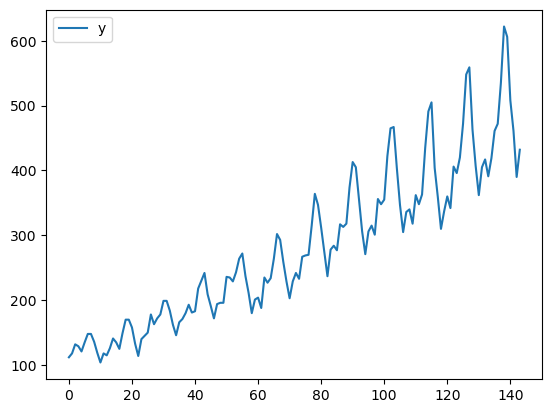

In [254]:
df[['y']].plot(legend=True)
plt.show()

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [256]:
splitrowi = 100
splitdate = df.iloc[splitrowi]['Month']
splitdate

'1957-05'

In [257]:
train_df = df.iloc[:splitrowi]
test_df = df.iloc[splitrowi:]

# split the row-based DataFrame by date
train_df = df[df['Month'] < splitdate]
test_df = df[df['Month'] >= splitdate]

In [258]:
#train_data = df.iloc[:100] # Goes up to but not including 108
#test_data = df.iloc[100:]

In [259]:
#df['Date'] = pd.to_datetime(df['Date'])
#train_data = train_data.set_index('Month')
#test_data = test_data.set_index('Month')
test_df.tail()

,Month,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [261]:
fitted_model = ExponentialSmoothing(train_df['y'],trend='mul',seasonal='mul',seasonal_periods=12).fit()   #dates=train_data.index freq='MS'

In [262]:
test_pred = fitted_model.forecast(40).rename('HW Forecast')
test_pred

100    349.048058
101    397.822186
102    444.097647
103    438.942123
104    389.671955
105    341.995200
106    300.365822
107    342.956801
108    351.855982
109    345.164161
110    402.008829
111    392.798036
112    394.310607
113    449.409484
114    501.685681
115    495.861618
116    440.202378
117    386.343175
118    339.315538
119    387.429470
120    397.482646
121    389.923069
122    454.139027
123    443.733831
124    445.442544
125    507.686327
126    566.741401
127    560.162107
128    497.285296
129    436.441941
130    383.316030
131    437.669100
132    449.025914
133    440.486054
134    513.029169
135    501.274688
136    503.204976
137    573.520176
138    640.233173
139    632.800714
Name: HW Forecast, dtype: float64

<Axes: >

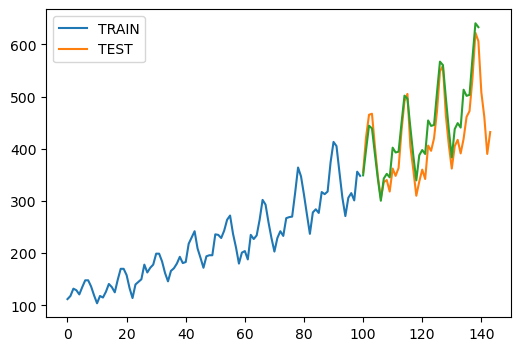

In [263]:
train_df['y'].plot(legend=True,label='TRAIN')
test_df['y'].plot(legend=True,label='TEST',figsize=(6,4));
test_pred.plot(label='PREDICTION')